In [28]:
import pandas as pd
import numpy as np
import matplotlib as pllt
from matplotlib import pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


In [6]:
df = pd.read_csv('../DataSets/supply_chain_data.csv')
#print(df.to_string())

In [5]:
df.head(2)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579


In [23]:
df.tail(2)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [24]:
df.shape

(100, 24)

In [25]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [29]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [30]:
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

## Cleaning Data
Bad data could be:
- Empty cells
- Duplicates
- Data in wrong format
- Wrong data

In [3]:
missing_values = df.isnull().any(axis=1)
print('Row  with missing values ' )
print(missing_values)

Row  with missing values 
0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


In [4]:
duplicates_values = df[df.duplicated()]
print('discover duplicates')
print(duplicates_values)
print(df.duplicated())

discover duplicates
Empty DataFrame
Columns: [Product type, SKU, Price, Availability, Number of products sold, Revenue generated, Customer demographics, Stock levels, Lead times, Order quantities, Shipping times, Shipping carriers, Shipping costs, Supplier name, Location, Lead time, Production volumes, Manufacturing lead time, Manufacturing costs, Inspection results, Defect rates, Transportation modes, Routes, Costs]
Index: []

[0 rows x 24 columns]
0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


In [6]:
# To remove duplicates, use the drop_duplicates() method.
df.drop_duplicates(inplace = True) # no duplicates, so nothing happens here 

## Quality Control check
Analyzing & visualizing Defect Rates for each Product Type

In [10]:
df.head(2)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579


In [13]:
Defect_rates_by_products = df.groupby('Product type')['Defect rates'].mean()
print('Defect raten by product type: ')
print(Defect_rates_by_products)

Defect raten by product type: 
Product type
cosmetics    1.919287
haircare     2.483150
skincare     2.334681
Name: Defect rates, dtype: float64


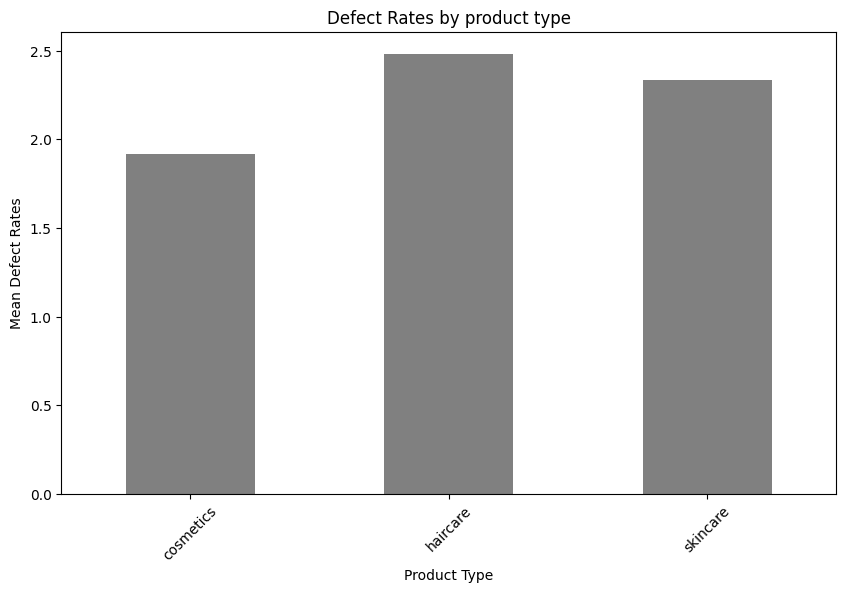

In [21]:
plt.figure(figsize=(10,6))
Defect_rates_by_products.plot(kind='bar', color='gray')
plt.title('Defect Rates by product type')
plt.xlabel('Product Type')
plt.ylabel('Mean Defect Rates')
plt.xticks(rotation=45)
plt.show()

## Supply Chain Risk Assessment 
- this analysis aims to identify higher-risk SKU within the supply chain by evaluating them.
- the combined impact of lead times and stock levels.
- By assigning risk scores to SKUs.
The analysis will help us to prioritize resources and attention to mitigate potential supply chain disruptions


In [22]:
df.head(2)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579


In [27]:
selected_columns=['SKU','Lead times','Stock levels']

risk_data = df[selected_columns]

risk_data['Risk Score'] = risk_data['Lead times'] * (1-risk_data['Stock levels'])

C:\Users\ghani\AppData\Local\Temp\ipykernel_30480\999716299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_data['Risk Score'] = risk_data['Lead times'] * (1-risk_data['Stock levels'])


In [30]:
risk_data = risk_data.sort_values(by='Risk Score', ascending=False)
print('Top 10 high risk SKUS')
print(risk_data.head(10))

Top 10 high risk SKUS
      SKU  Lead times  Stock levels  Risk Score
68  SKU68           8             0           8
2    SKU2          10             1           0
34  SKU34          26             1           0
16  SKU16           5             2          -5
4    SKU4           3             5         -12
78  SKU78           4             5         -16
87  SKU87           7             5         -28
76  SKU76           1            38         -37
8    SKU8          10             5         -40
47  SKU47          15             4         -45


## Inventory Optimization Analysis using EOQ

it will help us to determine the ideal order quantity for a particular product to minimize total inventory cost, including order costs and holding costs.

In [70]:
df.head(1)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Current Order Quantity
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.22641,Road,Route B,187.752075,96


In [71]:
holdingCost = 0.2

In [107]:
def calculateEOQ(df):
    D = df['Number of products sold']
    S = df['Costs']
    H = df['Number of products sold'] * holdingCost
    EOQ = np.sqrt((2*S*D)/H)
    return EOQ.round().astype(int)
    
df['EOQ'] = calculateEOQ(df)
#print(calculateEOQ(df))

In [108]:
df['Current Order Quantity'] = df['Order quantities']

In [109]:
comparision_columns = ['SKU','EOQ','Current Order Quantity']
df[comparision_columns]

,SKU,EOQ,Current Order Quantity
0,SKU0,43,96
1,SKU1,71,37
2,SKU2,38,88
3,SKU3,50,59
4,SKU4,96,56
...,...,...,...
95,SKU95,88,26
96,SKU96,43,32
97,SKU97,73,4
98,SKU98,94,27


## Customer Segmentation Analysis

- the objective of this analysis is to get to know more about your customers.
- By grouping our data based on customer demographics and are going to break down the generated

In [111]:
df.head(1)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Current Order Quantity,EOQ
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,215,29,46.279879,Pending,0.22641,Road,Route B,187.752075,96,43


In [112]:
mean_revenue = df.groupby(['Customer demographics','Product type'])['Revenue generated'].mean().reset_index()

sum_revenue = df.groupby(['Customer demographics','Product type'])['Revenue generated'].sum().reset_index()

In [114]:
print("Mean Revenue For Each Customer Demographics")
print(mean_revenue)
print("----------------------------------------------")
print("Sum Revenue For Each Customer Demographics")
print(sum_revenue)

Mean Revenue For Each Customer Demographics
   Customer demographics Product type  Revenue generated
0                 Female    cosmetics        6954.854220
1                 Female     haircare        6362.416642
2                 Female     skincare        6095.470280
3                   Male    cosmetics        5347.741374
4                   Male     haircare        5059.992731
5                   Male     skincare        7806.214493
6             Non-binary    cosmetics        5247.096332
7             Non-binary     haircare        5567.306726
8             Non-binary     skincare        4650.833889
9                Unknown    cosmetics        6335.182378
10               Unknown     haircare        4810.632195
11               Unknown     skincare        6287.152696
----------------------------------------------
Sum Revenue For Each Customer Demographics
   Customer demographics Product type  Revenue generated
0                 Female    cosmetics       69548.542197
1          

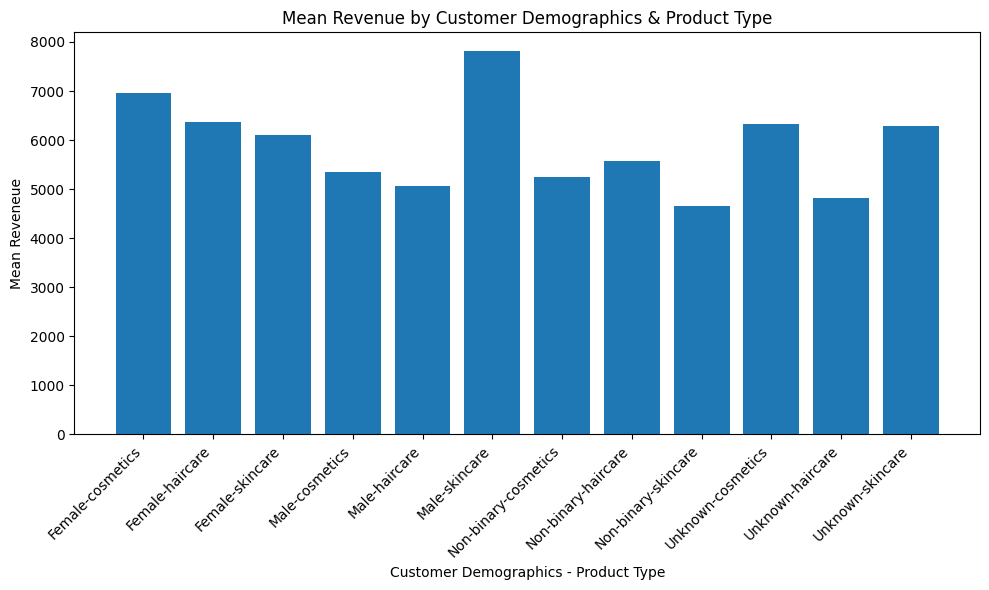

In [116]:
plt.figure(figsize=(10,6))
plt.bar(mean_revenue["Customer demographics"] + '-' + mean_revenue["Product type"], mean_revenue["Revenue generated"])
plt.xlabel("Customer Demographics - Product Type")
plt.ylabel("Mean Reveneue")
plt.title("Mean Revenue by Customer Demographics & Product Type")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

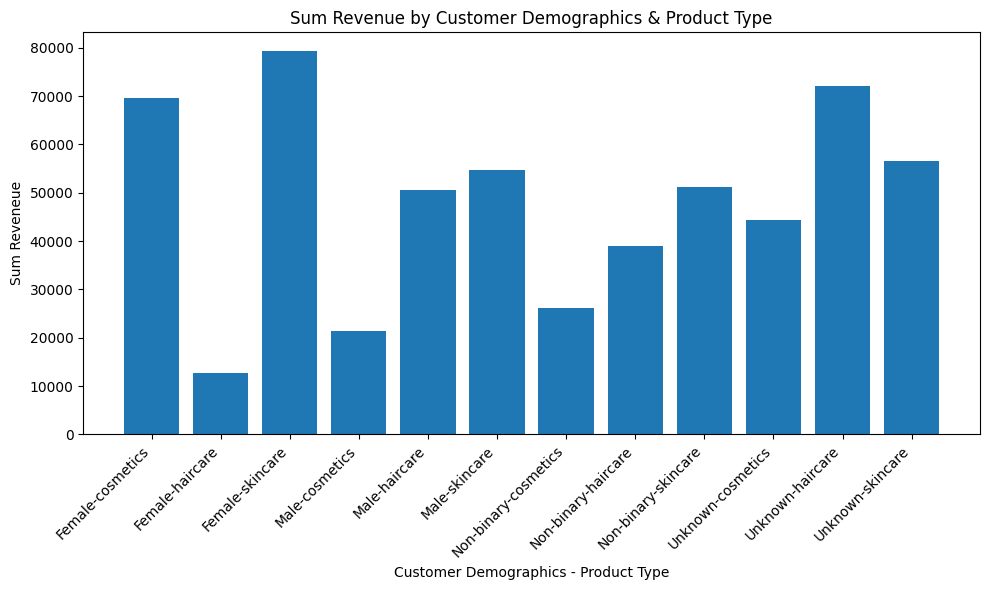

In [117]:
plt.figure(figsize=(10,6))
plt.bar(sum_revenue["Customer demographics"] + '-' + sum_revenue["Product type"], sum_revenue["Revenue generated"])
plt.xlabel("Customer Demographics - Product Type")
plt.ylabel("Sum Reveneue")
plt.title("Sum Revenue by Customer Demographics & Product Type")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

## lead time optimizations analysis.
- Find the most optimal transportation mode and the most optimal route to minimize the lead time.

In [5]:
df.head(1)
lead_times_column = "Lead times"
transportation_modes_column = "Transportation modes"
routes_column = "Routes"

In [6]:
average_lead_time_by_mode = df.groupby(transportation_modes_column)[lead_times_column].mean().reset_index()

best_transportation_mode = average_lead_time_by_mode.loc[average_lead_time_by_mode[lead_times_column].idxmin()]

best_mode = df[df[transportation_modes_column]==best_transportation_mode[transportation_modes_column]]

average_lead_time_by_route = df.groupby(routes_column)[lead_times_column].mean().reset_index()

best_route = average_lead_time_by_route.loc[average_lead_time_by_route[lead_times_column].idxmin()]

In [7]:
print("Average Lead Times by Transportation Mode:")
print(average_lead_time_by_mode)
print("The Best Transportation Mode (Shortest Average Lead Time):")
print(best_transportation_mode)
print("The Average Lead Times by Route within the Best Transportation Mode:")
print(average_lead_time_by_route)
print("The Best Routes (Shortest Average Lead Times) within the Best Transportation Mode:")
print(best_route)

Average Lead Times by Transportation Mode:
  Transportation modes  Lead times
0                  Air   18.269231
1                 Rail   14.892857
2                 Road   17.137931
3                  Sea   12.176471
The Best Transportation Mode (Shortest Average Lead Time):
Transportation modes          Sea
Lead times              12.176471
Name: 3, dtype: object
The Average Lead Times by Route within the Best Transportation Mode:
    Routes  Lead times
0  Route A   14.697674
1  Route B   17.216216
2  Route C   16.350000
The Best Routes (Shortest Average Lead Times) within the Best Transportation Mode:
Routes          Route A
Lead times    14.697674
Name: 0, dtype: object


## Forecasting Demand with LightGBM Model 

- Forecast the demand using a machine learning model called Lightgbm okay.

In [8]:
df.head(2)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579


In [10]:
target_column ="Number of products sold"
features = ['Price','Availability','Stock levels','Lead times','Order quantities']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_column], test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)

In [13]:
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate':0.05,
    'feature_fraction': 0.9
}

In [16]:
num_round = 100
bst = lgb.train(params,train_data,num_round)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 5
[LightGBM] [Info] Start training from score 453.200000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [17]:
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
print("Forecasted Customer Demand:", y_pred)

Forecasted Customer Demand: [602.26477999 462.50809993 470.25702294 382.77090386 325.46704061
 413.25164768 375.62754257 557.18903774 332.66809798 444.34647958
 346.02050077 409.1354491  497.41937115 360.4174601  336.97107195
 346.89585609 442.85618876 354.04827904 570.12310461 269.46575199]


## Cost Optimization with RNN
- Cost optimisation analysis using RNN which stands for Recurrent Neural

In [7]:
df.head(1)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.22641,Road,Route B,187.752075


In [8]:
target_column = "Manufacturing costs"
feature_column = "Production volumes"

In [9]:
X = df[feature_column].values.reshape(-1,1)
y = df[target_column].values


In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_column], df[target_column], test_size=0.2, random_state=42)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_dim=1),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [16]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100, 1)
y shape: (100,)


In [19]:
min_production_volume = df["Order quantities"].min()
max_production_volume = 1000
step_size = 10

In [20]:
cheapest_cost = float("inf")
best_production_volume = None

In [21]:
for production_volume in range(min_production_volume,max_production_volume + 1, step_size):
  normalized_production_volume = scaler.transform(np.array([[production_volume]]))
  predicted_cost = model.predict(normalized_production_volume)
  if production_volume == best_production_volume:
      best_cost = predicted_cost[0][0]
  if predicted_cost[0][0] >= 0:
      cheapest_cost = predicted_cost[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

In [22]:
print("Most Optimal Production Volume to Minimize Manifacturing Cost:",best_production_volume)
print("The Cheapest Manifacturing Cost", cheapest_cost)

Most Optimal Production Volume to Minimize Manifacturing Cost: None
The Cheapest Manifacturing Cost 0.029463723


## Forecasting Demand
- K-fold Cross-Validation is to assess the performance of a LightGBM model and evaluate its generalization capability.

In [24]:
df.head(1)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.22641,Road,Route B,187.752075


In [25]:
target_column ="Number of products sold"
features = ['Price','Availability','Stock levels','Lead times','Order quantities']

In [26]:
num_folds = 5

In [29]:
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [30]:
mse_scores = []

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_column], test_size=0.2, random_state=42)

In [33]:
for train_idex, test_index in kf.split(df):
  train_data = df.loc[train_idex,features]
  train_target = df.loc[train_idex,target_column]
  test_data = df.loc[test_index,features]
  test_target = df.loc[test_index,target_column]

In [34]:
train_data = lgb.Dataset(X_train, label=y_train)

In [35]:
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate':0.05,
    'feature_fraction': 0.9
}

In [36]:
num_round = 100
bst = lgb.train(params,train_data,num_round)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 5
[LightGBM] [Info] Start training from score 453.200000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [37]:
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

In [38]:
print("Forecasted Customer Demand:", y_pred)

Forecasted Customer Demand: [602.26477999 462.50809993 470.25702294 382.77090386 325.46704061
 413.25164768 375.62754257 557.18903774 332.66809798 444.34647958
 346.02050077 409.1354491  497.41937115 360.4174601  336.97107195
 346.89585609 442.85618876 354.04827904 570.12310461 269.46575199]


In [39]:
mse = mean_squared_error(test_target,y_pred)
mse_scores.append(mse)

In [40]:
average_mse = sum(mse_scores)/num_folds

In [41]:
print("Average MSE:")
print(average_mse)

Average MSE:
13258.838709275815
